<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Testing and Median Household Income

## Problem Statement

Standardized testing in the US college admissions process has been widely criticized for underlying bias associated with the SAT & ACT. While many socio-economic factors have been directly linked to performance, we hypothesize family social and economic backgrounds have the biggest influence on a student’s life.

Our non-profit seeks to identify these lesser affluent families along side the states with the least participation rate and student performance so that we may better allocate resources.


## Executive Summary

### Contents:
- [Data](#Data-Import-and-Cleaning)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Data

* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

* [`Median_income_2019.csv`](./data/Median Household Income by State.csv): 2019 Median Household Income by State


1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [25]:
def avg(list_num):
    avg = sum(list_num)/len(list_num)
    return avg

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [26]:
def std_dev(list_num):
    avg_sum= 0
    for num in list_num: 
        avg_sum += num
    avg_list = avg_sum/len(list_num)
    
    var = 0
    for num in list_num: 
        var += ((num - avg_list) ** 2)
    std_total = (var * (1/len(list_num))) ** (1/2)
    
    return std_total

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

In [94]:
def remove_percent_symbol(x):
     x[''] = x[''].apply(lambda x: float(x.replace('%',''))/100)
     return x

### Data Import & Cleaning

In [160]:
# Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb

In [96]:
sat_2019 = pd.read_csv('~/GA/lessons/Project/project_1/data/sat_2019.csv')
act_2019 = pd.read_csv('~/GA/lessons/Project/project_1/data/act_2019.csv')

In [97]:
Median_income = pd.read_csv('~/GA/lessons/Project/project_1/data/Median Household Income by State.csv')
Median_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Median Household Income by State  54 non-null     object
 1   Unnamed: 1                        53 non-null     object
 2   Unnamed: 2                        53 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [98]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [99]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [100]:
Median_income.head()

,Median Household Income by State,Unnamed: 1,Unnamed: 2
0,State,Income,Margin Of Error
1,Alabama,"$50,536",+/- $304
2,Alaska,"$77,640","+/- $1,015"
3,Arizona,"$58,945",+/- $266
4,Arkansas,"$47,597",+/- $328


In [101]:
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [102]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [103]:
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

sat_2019.head()

In [104]:
act_2019.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [105]:
Median_income.dtypes

Median Household Income by State    object
Unnamed: 1                          object
Unnamed: 2                          object
dtype: object

In [106]:
##remove Puerto Rico and Virgin Islands from SAT row as we have incomplete data
sat_2019.drop(index=39, inplace=True)
sat_2019.drop(index=47, inplace=True)

In [109]:
def remove_percent_symbol(dataframe):
     dataframe['Participation Rate'] = dataframe['Participation Rate'].apply(lambda x: float(x.replace('%',''))/100)
     return dataframe

In [110]:
sat_2019 = remove_percent_symbol(sat_2019)

In [112]:
def remove_percent_symbol(dataframe):
     dataframe['Participation'] = dataframe['Participation'].apply(lambda x: float(x.replace('%',''))/100)
     return dataframe

In [113]:
act_2019 = remove_percent_symbol(act_2019)

In [128]:
act_2019['Composite'] = act_2019['Composite'].astype(float)

In [129]:
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].astype(float)

In [130]:
sat_2019.tail(20)

,State,Participation Rate,EBRW,Math,Total
31,New Mexico,0.18,543,530,1073
32,New York,0.79,531,533,1064
33,North Carolina,0.51,554,546,1100
34,North Dakota,0.02,627,636,1263
35,Ohio,0.19,550,548,1097
36,Oklahoma,0.22,490,472,963
37,Oregon,0.51,562,550,1112
38,Pennsylvania,0.70,545,537,1082
40,Rhode Island,1.00,503,492,995
41,South Carolina,0.68,526,504,1030


In [131]:
##remove National row from ACT 
act_2019.drop(index=51, inplace=True)

KeyError: '[51] not found in axis'

In [132]:
act_2019.head()

,State,Participation,Composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [133]:
Median_income.drop(index=52, inplace=True)
Median_income.drop(index=53, inplace=True)

KeyError: '[52] not found in axis'

In [134]:
Median_income.head()

,Median Household Income by State,Unnamed: 1,Unnamed: 2
1,Alabama,"$50,536",+/- $304
2,Alaska,"$77,640","+/- $1,015"
3,Arizona,"$58,945",+/- $266
4,Arkansas,"$47,597",+/- $328
5,California,"$75,235",+/- $232


In [135]:
Median_income.drop(index=0, inplace=True)

KeyError: '[0] not found in axis'

In [136]:
Median_income.head()

,Median Household Income by State,Unnamed: 1,Unnamed: 2
1,Alabama,"$50,536",+/- $304
2,Alaska,"$77,640","+/- $1,015"
3,Arizona,"$58,945",+/- $266
4,Arkansas,"$47,597",+/- $328
5,California,"$75,235",+/- $232


In [137]:
def remove_dollar_symbol(dataframe):
    dataframe['median_income_19'] = dataframe['median_income_19'].apply(lambda x: float(x.replace('$',''))/100)
    dataframe['median_income_19'] = dataframe['median_income_19'].apply(lambda x: float(x.replace(',',''))/100)
    return dataframe

In [138]:
Median_income = remove_dollar_symbol(Median_income)

KeyError: 'median_income_19'

In [139]:
Median_income['median_income_19'] = Median_income['median_income_19'].astype(object)

KeyError: 'median_income_19'

In [140]:
sat_2019.columns

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')

In [141]:
sat_new_columns_dict = {
    'State':'state',
    'Participation Rate': 'sat_participation_rate_19',
    'EBRW': 'sat_ebrw_19',
    'Math': 'sat_math_19',
    'Total': 'sat_total_19'}

sat_2019.rename(columns=sat_new_columns_dict, inplace=True)

In [142]:
sat_2019.columns

Index(['state', 'sat_participation_rate_19', 'sat_ebrw_19', 'sat_math_19',
       'sat_total_19'],
      dtype='object')

In [143]:
act_2019.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [144]:
act_new_columns_dict = {
    'State':'state',
    'Participation': 'act_participation_19',
    'Composite': 'act_composite_19'
}

act_2019.rename(columns=act_new_columns_dict, inplace=True)

In [145]:
act_2019.columns

Index(['state', 'act_participation_19', 'act_composite_19'], dtype='object')

In [146]:
Median_income.columns

Index(['Median Household Income by State', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')

In [147]:
Median_income_new_columns_dict = {
    'Median Household Income by State':'state',
    'Unnamed: 1': 'median_income_19',
    'Unnamed: 2': 'margin of error'         
}

Median_income.rename(columns=Median_income_new_columns_dict, inplace=True)

In [148]:
Median_income.columns

Index(['state', 'median_income_19', 'margin of error'], dtype='object')

In [149]:
final_2019_csv = pd.merge(sat_2019, act_2019, on='state')

In [150]:
final_2019= pd.merge(final_2019_csv, Median_income, on='state')

In [151]:
final_2019.to_csv('~/GA/lessons/Project/project_1/data/final_2019.csv')

In [152]:
final = final_2019

In [153]:
final

,state,sat_participation_rate_19,sat_ebrw_19,sat_math_19,sat_total_19,act_participation_19,act_composite_19,median_income_19,margin of error
0,Alabama,0.07,583,560,1143,1.00,18.9,"$50,536",+/- $304
1,Alaska,0.41,556,541,1097,0.38,20.1,"$77,640","+/- $1,015"
2,Arizona,0.31,569,565,1134,0.73,19.0,"$58,945",+/- $266
3,Arkansas,0.06,582,559,1141,1.00,19.3,"$47,597",+/- $328
4,California,0.63,534,531,1065,0.23,22.6,"$75,235",+/- $232
5,Colorado,1.00,518,506,1024,0.27,23.8,"$72,331",+/- $370
6,Connecticut,1.00,529,516,1046,0.22,25.5,"$78,444",+/- $553
7,Delaware,1.00,499,486,985,0.13,24.1,"$68,287",+/- $696
8,District of Columbia,0.94,495,480,975,0.32,23.5,"$86,420","+/- $1,008"
9,Florida,1.00,516,483,999,0.54,20.1,"$55,660",+/- $220


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|states|object|ACT/SAT|States
|act_participation_2019|float|ACT|ACT Participation
|sat_participation_rate_2019|float|SAT|SAT Participation rate
|act_composite_2019|float|ACT|ACT Composite
|sat_total_19|float|SAT|SAT Total scores
|median_income_19|float|ACT/SAT|Median household income


## Exploratory Data Analysis

In [79]:
#Code:
final.describe()

,sat_ebrw_19,sat_math_19,sat_total_19,act_participation_19,act_composite_19
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,560.803922,552.196078,1113.078431,0.586667,21.464706
std,46.248035,51.290553,97.197910,0.345159,2.194523
min,483.000000,460.000000,943.000000,0.060000,17.900000
25%,527.500000,511.500000,1038.000000,0.245000,19.800000
50%,550.000000,546.000000,1097.000000,0.540000,21.100000
75%,612.000000,599.000000,1210.000000,1.000000,23.700000
max,636.000000,648.000000,1284.000000,1.000000,25.500000


In [80]:
sd = {col: round(std_dev(final[col]),6) for col in final.columns if ((final[col].dtype == float) | (final[col].dtype == 'int64'))} 
sd

{'sat_ebrw_19': 45.792379,
 'sat_math_19': 50.785215,
 'sat_total_19': 96.240272,
 'act_participation_19': 0.341758,
 'act_composite_19': 2.172901}

In [154]:
#SAT participation rate - highest
#We can see a high emphasis on the East Coast for the SAT however we still see WV and a few other states with a lower average score.
mask = final['sat_participation_rate_19'] > 0.95
final[mask][['state', 'sat_participation_rate_19', 'sat_total_19']].sort_values('sat_participation_rate_19').head()

,state,sat_participation_rate_19,sat_total_19
19,Maine,0.99,1013
48,West Virginia,0.99,943
5,Colorado,1.00,1024
6,Connecticut,1.00,1046
7,Delaware,1.00,985


In [155]:
#SAT participation rate - lowest
#We can see a lower interest along the midwest for the SAT however we do notice a higher average SAT score, implying participation rate is not directly correlated to higher scores.
mask = final['sat_participation_rate_19'] < 0.05
final[mask][['state', 'sat_participation_rate_19', 'sat_total_19']].sort_values('sat_participation_rate_19').head()

,state,sat_participation_rate_19,sat_total_19
34,North Dakota,0.02,1263
15,Iowa,0.03,1244
24,Mississippi,0.03,1237
27,Nebraska,0.03,1260
41,South Dakota,0.03,1268


In [156]:
#ACT participation rate - highest
#We can see a higher participation rage along these midwest states for the ACT in comparison to the previous line and SAT participation. This may infer the midwest may just prefer the ACT over SAT.
mask = final['act_participation_19'] > 0.95
final[mask][['state', 'act_participation_19', 'act_composite_19']].sort_values('act_participation_19').head()

,state,act_participation_19,act_composite_19
34,North Dakota,0.96,19.9
0,Alabama,1.00,18.9
3,Arkansas,1.00,19.3
17,Kentucky,1.00,19.8
18,Louisiana,1.00,18.8


In [157]:
#ACT participation rate - lowest
#We can see a lower emphasis on the East Coast for the ACT however we still see a higher average score.
mask = final['act_participation_19'] > 0.05
final[mask][['state', 'act_participation_19', 'act_composite_19']].sort_values('act_participation_19').head()

,state,act_participation_19,act_composite_19
19,Maine,0.06,24.3
39,Rhode Island,0.12,24.7
7,Delaware,0.13,24.1
29,New Hampshire,0.14,25.0
38,Pennsylvania,0.17,23.6


In [158]:
#Median household income - highest
#highest median family income per state
mask = final['median_income_19'] > 0.95
final[mask][['state', 'median_income_19']].sort_values('median_income_19').head()

TypeError: '>' not supported between instances of 'str' and 'float'

In [159]:
#Median household income - lowest
#lowest median family income per state
mask = final['median_income_19'] > 0.05
final[mask][['state', 'median_income_19']].sort_values('median_income_19').head()

TypeError: '>' not supported between instances of 'str' and 'float'

In [87]:
final

,state,sat_participation_rate_19,sat_ebrw_19,sat_math_19,sat_total_19,act_participation_19,act_composite_19,median_income_19,margin of error
0,Alabama,7%,583,560,1143,1.00,18.9,"$50,536",+/- $304
1,Alaska,41%,556,541,1097,0.38,20.1,"$77,640","+/- $1,015"
2,Arizona,31%,569,565,1134,0.73,19.0,"$58,945",+/- $266
3,Arkansas,6%,582,559,1141,1.00,19.3,"$47,597",+/- $328
4,California,63%,534,531,1065,0.23,22.6,"$75,235",+/- $232
5,Colorado,100%,518,506,1024,0.27,23.8,"$72,331",+/- $370
6,Connecticut,100%,529,516,1046,0.22,25.5,"$78,444",+/- $553
7,Delaware,100%,499,486,985,0.13,24.1,"$68,287",+/- $696
8,District of Columbia,94%,495,480,975,0.32,23.5,"$86,420","+/- $1,008"
9,Florida,100%,516,483,999,0.54,20.1,"$55,660",+/- $220


Text(0.5, 1, '2019 SAT/ACT Correlation Heatmap')

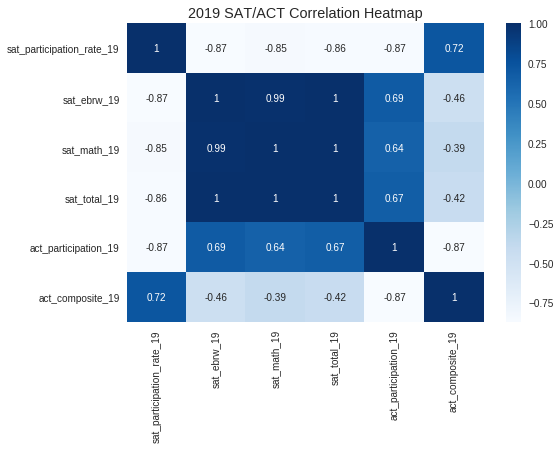

In [192]:
corr = final[final.columns[:-1]].corr()
heat = sb.heatmap(corr, cmap='Blues', annot=True)
plt.title("2019 SAT/ACT Correlation Heatmap")

In [235]:
##Modified outside code from Stack Overflow
def histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):

    nrows=int(np.ceil((len(list_of_columns))/2))
    fig, hist = plt.subplots(nrows=nrows, ncols=2, figsize= (10, 5 * len(list_of_columns))) 
 
    hist = hist.ravel() 
    for i, column in enumerate(list_of_columns): 
        color='black'
                    
        hist[i].hist(dataframe[column], color=color) 
        hist[i].set_ylabel('Frequency')
        hist[i].set_xlabel('Participation')
        hist[i].set_title(list_of_titles[i])

        

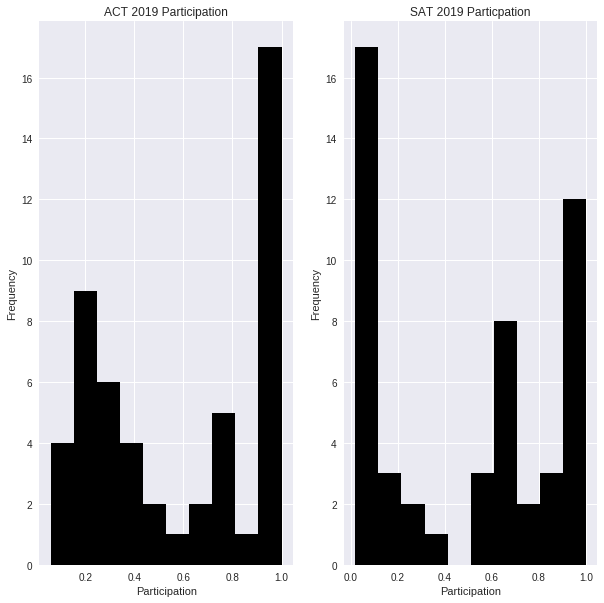

In [236]:
part_cols = ['act_participation_19', 
                      'sat_participation_rate_19']

titles = ['ACT 2019 Participation',
          'SAT 2019 Particpation']

xlabels = ["Participation", "Participation", "Participation", "Participation"]

histograms(final[part_cols], part_cols, titles, xlabels)

## Data Visualization

In [239]:
def scatter_plot(variable1, variable2, title):
    plt.title(title)
    plt.scatter(variable1, variable2)
    scatter = sb.scatterplot(variable1, variable2)
    scatter.set(xlabel='ACT', ylabel='SAT')

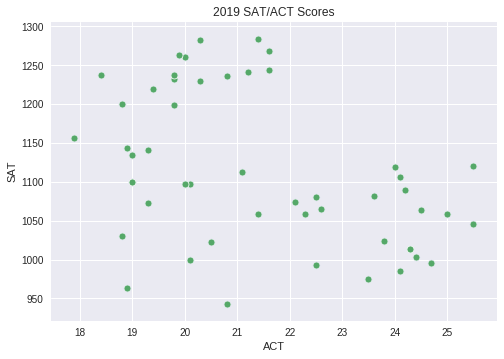

In [240]:
## ACT & SAT Correlation for All Data
#No Correlation
scatter_plot(final['act_composite_19'], final['sat_total_19'], 
                 "2019 SAT/ACT Scores");

In [241]:
def scatter_plot(variable1, variable2, title):
    plt.title(title)
    plt.scatter(variable1, variable2, )
    scatter = sb.scatterplot(variable1, variable2)
    scatter.set(xlabel='ACT', ylabel='ACT Participation')

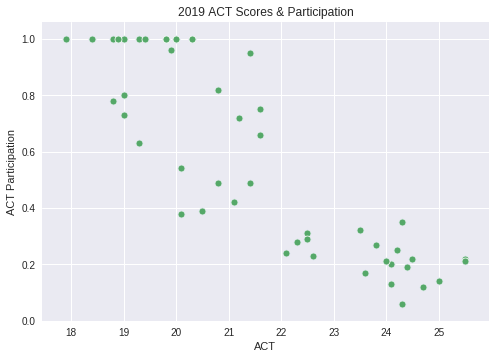

In [242]:
## ACT Correlation 
#negative correlation
scatter_plot(final['act_composite_19'], final['act_participation_19'], 
                 "2019 ACT Scores & Participation");

In [243]:
def scatter_plot(variable1, variable2, title):
    plt.title(title)
    plt.scatter(variable1, variable2,)
    scatter = sb.scatterplot(variable1, variable2)
    scatter.set(xlabel='SAT', ylabel='SAT Participation')

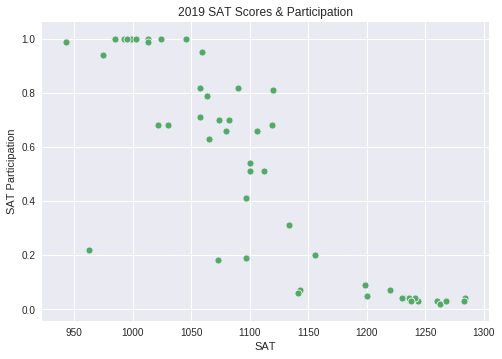

In [244]:
## SAT Correlation 
#negative correlation
scatter_plot(final['sat_total_19'], final['sat_participation_rate_19'], 
                                  "2019 SAT Scores & Participation");

[Text(0, 0.5, 'Score'), Text(0.5, 0, '')]

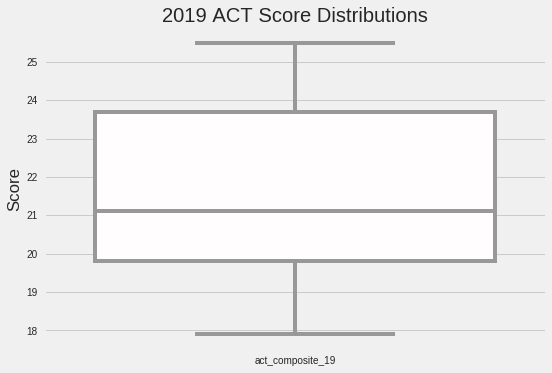

In [260]:
plt.title("2019 ACT Score Distributions")
box_plot = sb.boxplot(data=final[['act_composite_19']], palette='seismic');
box_plot.set(xlabel='', ylabel='Score')

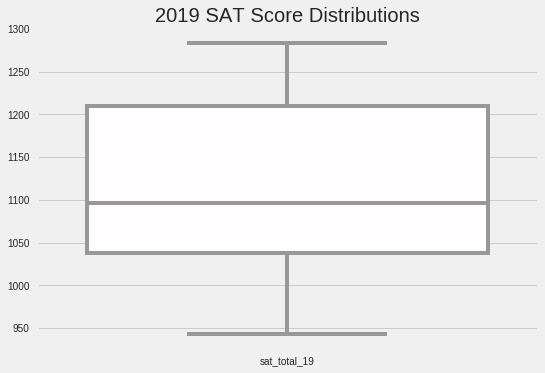

In [276]:
plt.title("2019 SAT Score Distributions")
box_plot.set(xlabel='', ylabel='Score')
box_plot = sb.boxplot(data=final[['sat_total_19']], palette='seismic');

[Text(0, 0.5, 'Score'), Text(0.5, 0, '')]

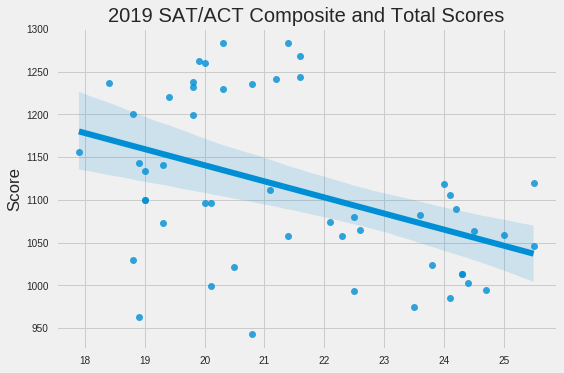

In [270]:
#Graphing the loose negative relationship between ACT and SAT Scores

plt.title("2019 SAT/ACT Composite and Total Scores")

reg_plot = sb.regplot(final['act_composite_19'], final['sat_total_19'])

reg_plot.set(xlabel='', ylabel='Score')


[Text(0, 0.5, 'Score'), Text(0.5, 0, '')]

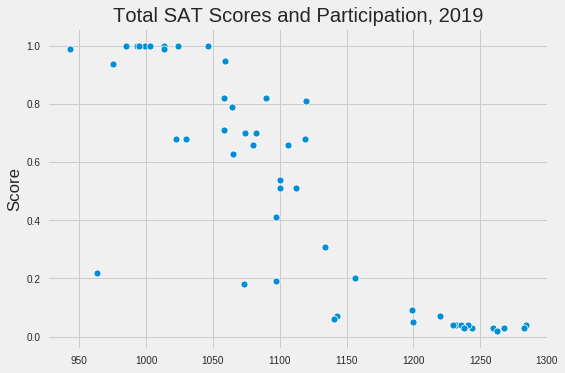

In [273]:
#Showing the strong negative correlation between SAT participation and Total Test Scores
plt.title("Total SAT Scores and Participation, 2019")
corr_plot = sb.scatterplot(final['sat_total_19'], final['sat_participation_rate_19'])
corr_plot.set(xlabel='', ylabel='Score')

[Text(0, 0.5, 'Score'), Text(0.5, 0, '')]

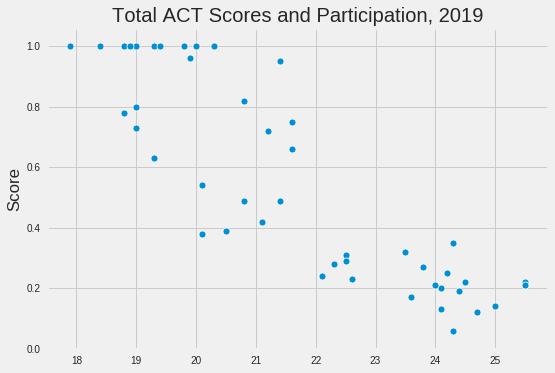

In [275]:
#Showing the strong negative correlation between ACT participation and Total Test Scores
plt.title("Total ACT Scores and Participation, 2019")
Total_Act = sb.scatterplot(final['act_composite_19'], final['act_participation_19'])
Total_Act.set(xlabel='', ylabel='Score')

## Conclusions and Recommendations

Based on our analyzed data findings, we can quickly find the states with the lower participation and performance metrics however there were some interesting conclusions stemming from our data. One observation we made was the actually statistics behind the demographics playing an instrumental role in performance. Where we see some states like North Dakota, having the lowest percentile SAT participation rates, we can see an indirect correlation here as the same state also ranks the highest in ACT participation. Another geographic trend we noticed, was the preference for the SAT along the eastern coastal states shown by the lower ACT participation data. 

Our recommendation to tackle the economic bias in these exams is simple, provide more resources to those who need them the most. As in this example, states suchas West Viriginia, Arkansas, and Louisiana fall into the lower family income bracket and as such, testing performance has shown to be affected. We will need to take a deeper dive on how funds can be best used to bridge the economic divide however it would be a good start to allocate funding based on performance metrics. Programs such as funding for meals, educational resources, testing prep, tutoring, and after school programs are the basic needs these students deserve.